#                  HEART DISEASE PREDICTION MODEL PROJECT
    
    MADE BY -SIDDHARTHA SAMANT   GOURAV KASHYAP,
    BIRLA INSTITUTE OF TECHNOLOGY
    

**THIS PROJECT IS BASED ON  A CLASSIFICATION PROBLEM THAT IS SOLVED
UNDER THE UNSUPERVISED LEARNING MACHINE LEARNING METHOD.

THE CLASSIFICATION PROBLEM IS SOLVED USING THE LOGISTIC REGRESSION MODELLING METHOD.
WE TRAIN UR DATA ON THE GIVEN MEDICAL PARAMETERS TO PREDICT A BINARY OUTPUT; THAT IS ,
WHETHER A PERSON HAS CHRONIC HEART DISEASE OR NOT.

In [1]:
pwd

'C:\\Users\\Lenovo'

In [2]:
cd E:\\python35

E:\python35


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


**READING THE DATASET

In [5]:
df=pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# NOW WE DEAL WITH THE NULL VALUES ,WE FILL THE NAN VALUES WITH THE FEATURES AVERAGE VALUE,(THIS APPROACH MAY VARY SITUATION WISE)

In [6]:
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [8]:
df['education'].describe()

count    4135.000000
mean        1.979444
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [90]:
df['education']=df['education'].fillna(2)

In [11]:
df['cigsPerDay'].describe()

count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [13]:
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].mean())


In [14]:
df['BPMeds'].describe()

count    4187.000000
mean        0.029615
std         0.169544
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [15]:
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].mean())


In [19]:
df['totChol'].describe()

count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [20]:
df["totChol"] = df["totChol"].fillna(df["totChol"].mean())


In [21]:
df['BMI'].describe()

count    4221.000000
mean       25.800801
std         4.079840
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [22]:
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

In [24]:
df['heartRate'].describe()

count    4239.000000
mean       75.878981
std        12.025348
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [25]:
df["heartRate"] = df["heartRate"].fillna(df["heartRate"].mean())

In [26]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [27]:
df["glucose"] = df["glucose"].fillna(df["glucose"].mean())

#  NOW WE USE VISUAL TOOLS TO ANALYSE HOW CERTAIN QUANTITIES ARE RELATED,LIKE HOW CHOLESTROL EFFECTS BP ,HOW AGE MATTERS

WE USE DIFFERENT TYPES OF PLOTS ACCORDING TO SITUATION,
THE LINE PLOT
THE BOXPLOT
THE CORRELATION MAP
THE JOINT PLOT



## THE HEAT MAP IS A TOOL WHICH BEST SHOWS A VISUAL REPRESENTATION OF HOW ALL THE FEATURES ARE CORRELATED FROM EACH OTHER,
ITS A SQUARE MATRIX WITH WHOSE COLOUR INTENSITY OF EACH BLOCK SHOWS THE AMOUNT OF CORRELATION

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text yticklabel objects>)

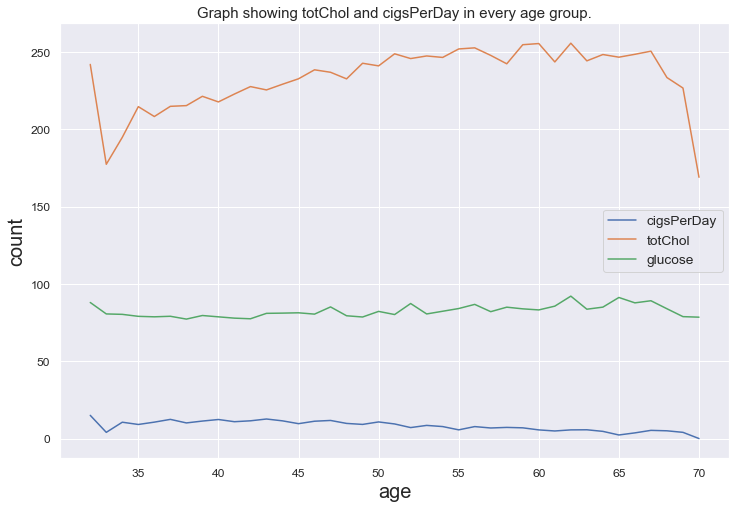

In [111]:

graph1 = df.groupby("age").cigsPerDay.mean()
graph2 = df.groupby("age").totChol.mean()
graph3 = df.groupby("age").glucose.mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=graph1, label="cigsPerDay")
sns.lineplot(data=graph2, label="totChol")
sns.lineplot(data=graph3, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.")
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

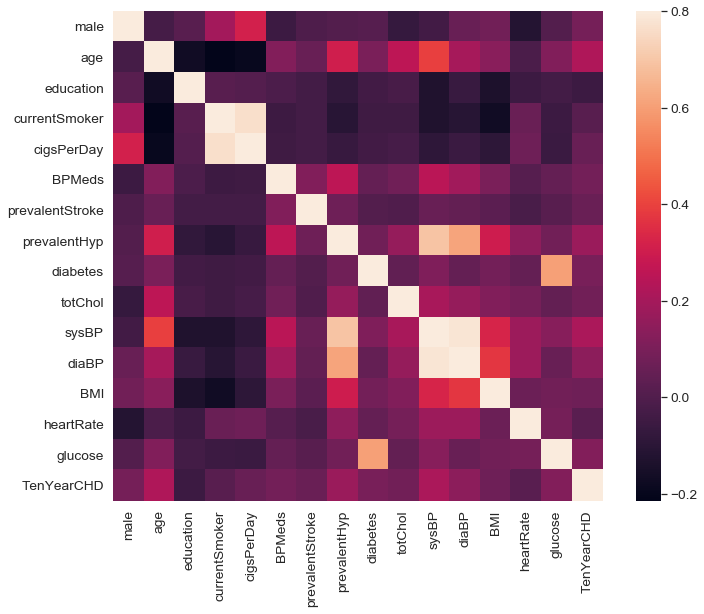

In [40]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

*WE TRY TO SEE HOW THE AMOUNT OF CIGARETTES SMOKED IN A DAY AFFECTS THE HEART RATE OF A  PERSON 
FOR THIS WE USE A JOINT PLOT 

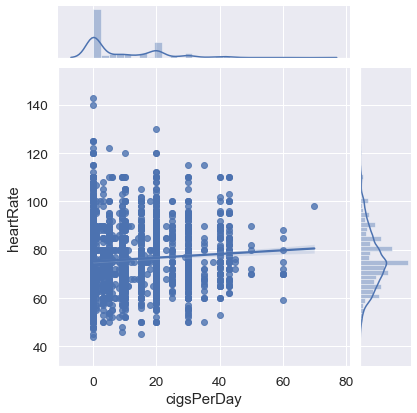

In [44]:
sns.jointplot(x=df['cigsPerDay'], y=df['heartRate'],kind='reg')


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

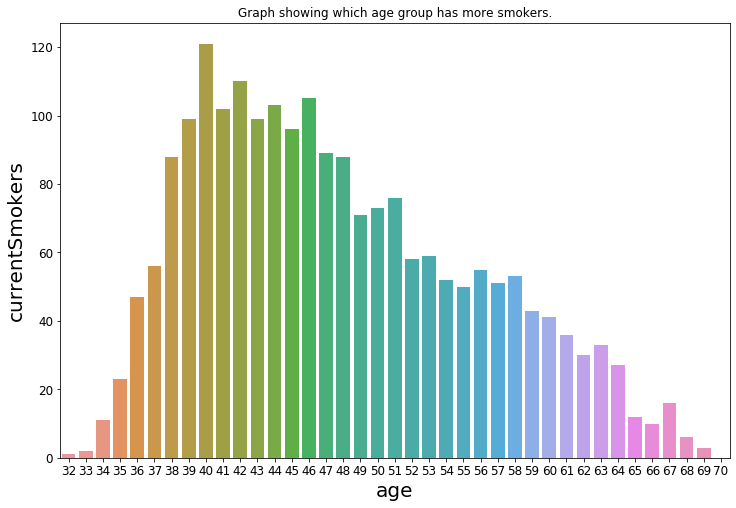

In [38]:

graph4 = df.groupby("age",as_index=False).currentSmoker.sum()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_7["age"], y=graph4["currentSmoker"])
plt.title("Graph showing which age group has more smokers.")
plt.xlabel("age", size=20)
plt.ylabel("currentSmokers", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

#  WE FIND THAT MIDDLE AGED PEOPLE FORM THE MAJORITY OF CURRENT SMOKERS

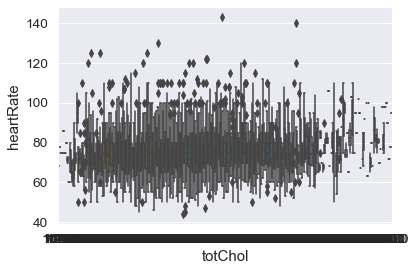

In [112]:
sns.boxplot(x=df['totChol'], y=df['heartRate'])


# *NOW WE DEFINE OUR TRAINING AND TESTING DATA SET, AND DROPPING THE TARGET VARIABLE ,WE TRAIN OUR MODEL USING LOGISTIC REGRESSION

In [113]:

train = df.drop(columns=["TenYearCHD"])
target = df["TenYearCHD"]
model = LogisticRegression(random_state=42,max_iter=7000,penalty='l2')
train_X, test_X, train_y, test_y = train_test_split(train,target, test_size=0.3)



In [91]:

model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**AFTER FITTING WE USE THE .SCORE FUNCTION TO PREDICT THE ACCURACY OF THE MODEL

In [92]:
model.score(test_X, test_y)

0.8655660377358491

# DEPLOYING THE MODEL FOR CLIENT USE  :   


#  USING   FLASK ,THE PICKLED MODEL ,AND A HTML PAGE ,

# THE MODEL WAS DEPLOYED ON THE LOCAL HOST PORT 5000
 ## THE CODE FOR THE FLASK APP. AND THE HTML ARE PRESENT IN THE GITHUB REPOS.
 ## BELOW THE SNAPS OF THE HTML PAGES AND THE FLASK RUNNING FROM COMMAND PROMPT ARE PROVIDED 

In [94]:
import pickle
pickle.dump(model, open('heart.pkl','wb'))
model=pickle.load(open('heart.pkl','rb'))


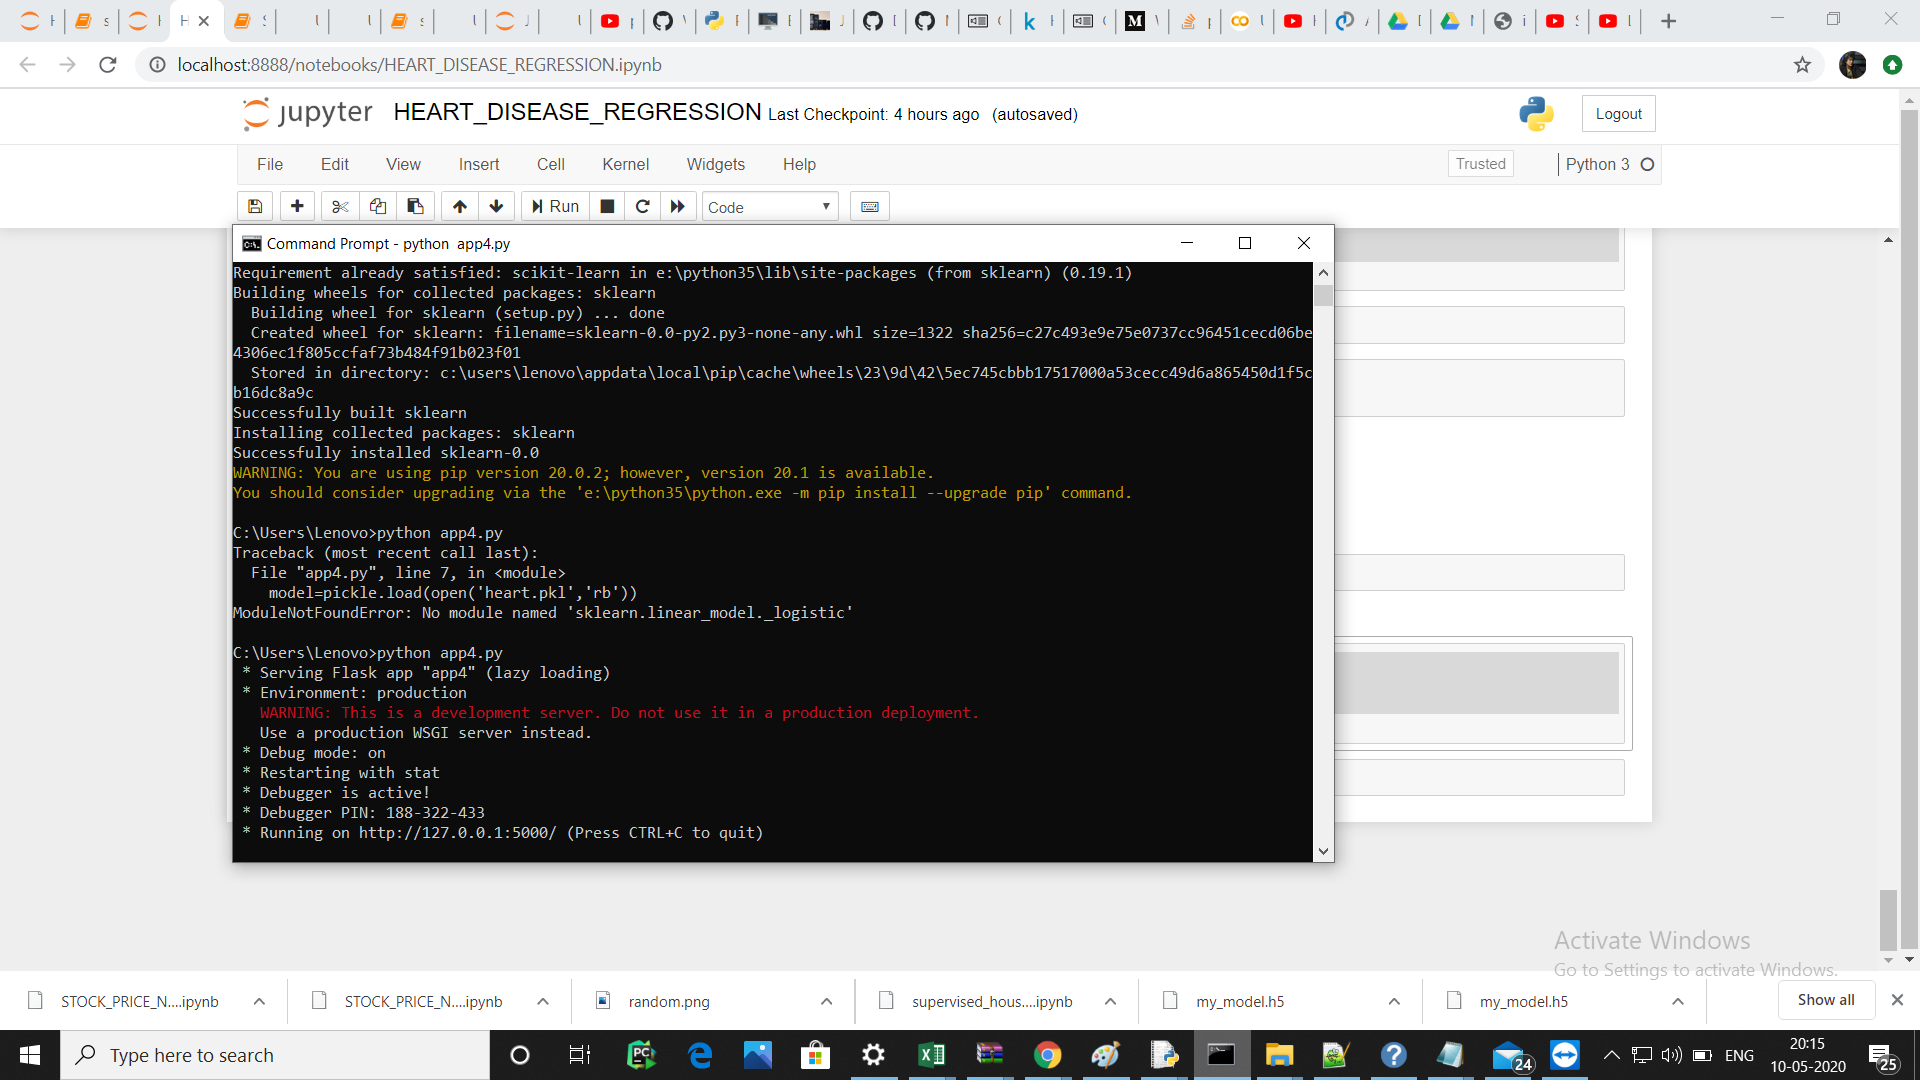

In [109]:
from IPython.display import Image
Image(filename='Screenshot (7).png')

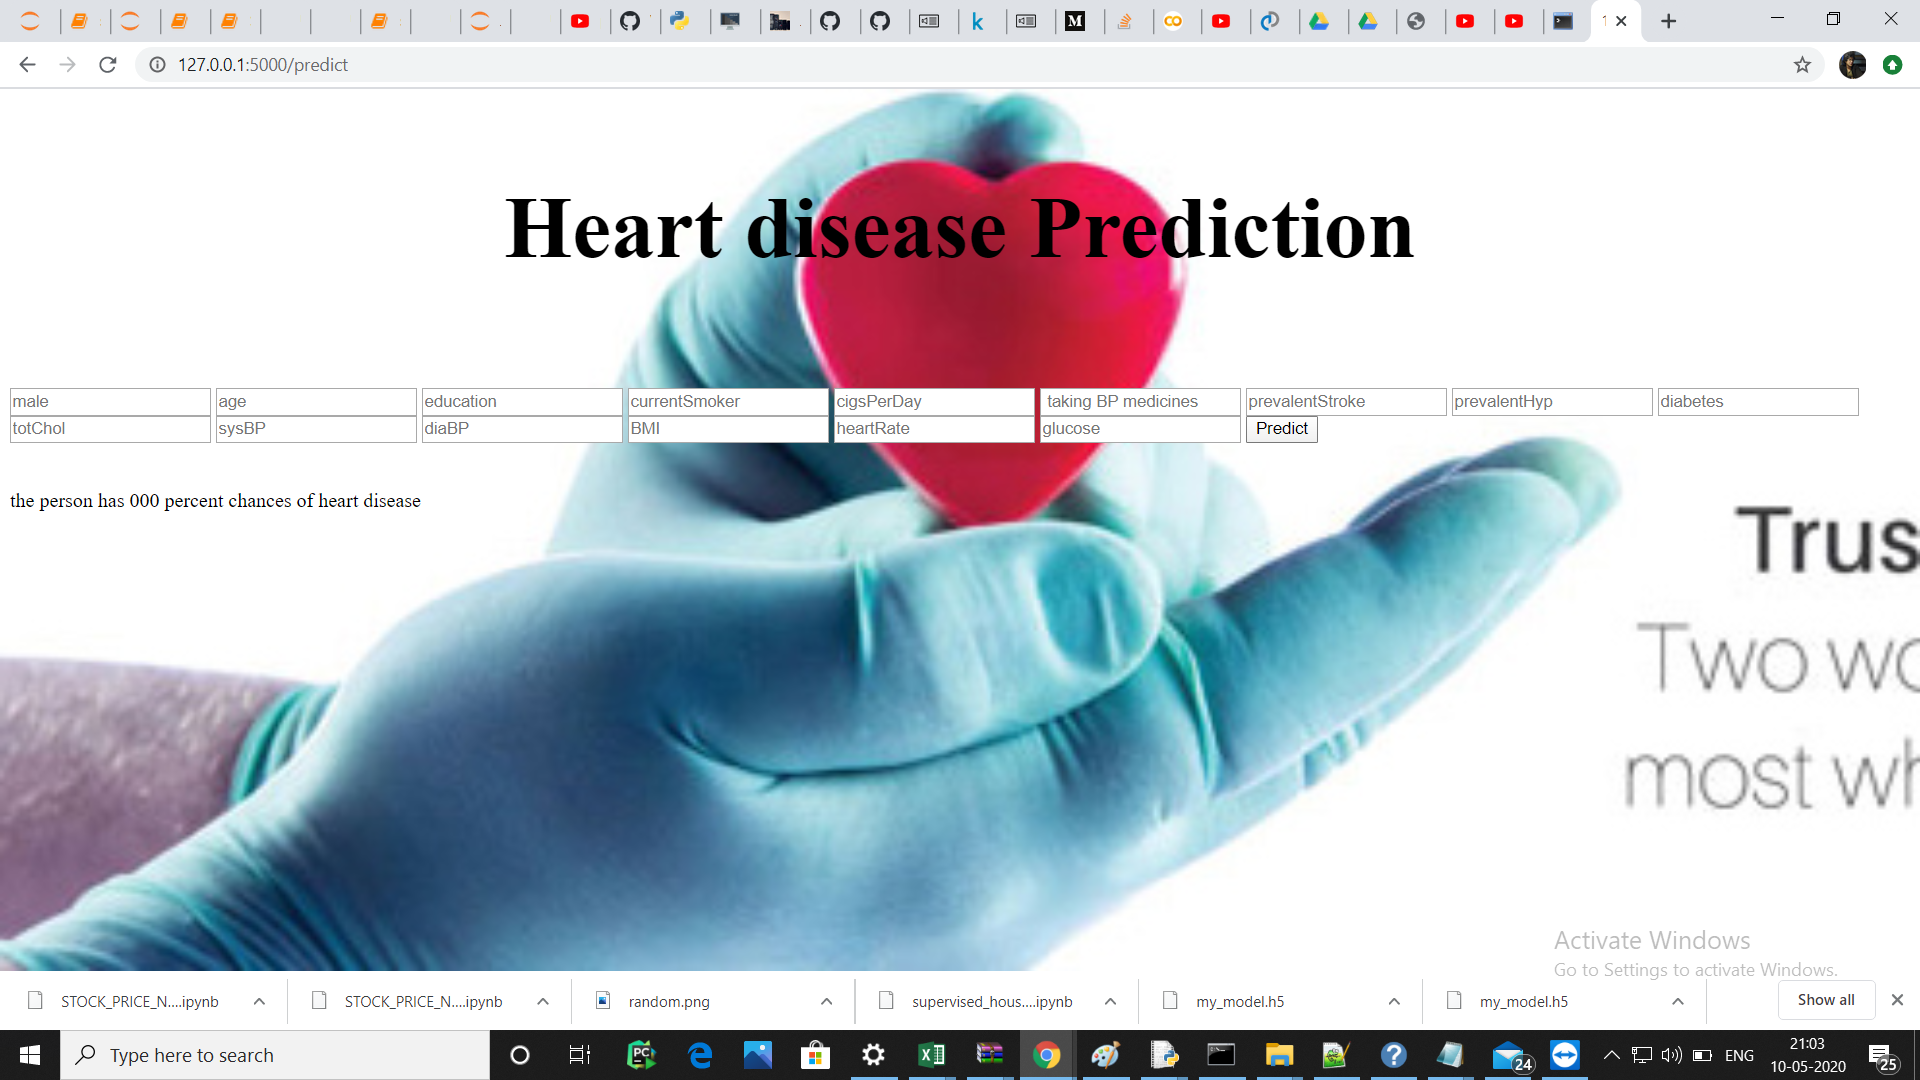

In [110]:
from IPython.display import Image
Image(filename='Screenshot (9).png')